In [296]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [297]:
df = pd.read_csv('FormattedData/train.csv',index_col='Timestamp',infer_datetime_format=True)

df.head()

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-02-09 09:42:12,3.76,0.31,2.31,0.26,-2.89,0.17,6.07,0.30
2022-02-09 09:47:12,3.18,0.31,2.31,0.26,-2.31,0.14,6.94,0.28
2022-02-09 09:52:13,3.47,0.31,2.02,0.26,-2.60,0.13,7.23,0.28
2022-02-09 09:57:13,3.47,0.30,2.02,0.25,-2.02,0.14,6.94,0.28
2022-02-09 10:02:13,3.47,0.30,2.02,0.25,-2.02,0.10,7.23,0.28


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11936 entries, 2022-02-09 09:42:12 to 2022-03-23 12:30:45
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MON1 CL DDM (?A)   11936 non-null  float64
 1   MON1 CL RF (dB)    11936 non-null  float64
 2   MON1 DS DDM (?A)   11936 non-null  float64
 3   MON1 DS RF (dB)    11936 non-null  float64
 4   MON1 NF DDM (?A)   11936 non-null  float64
 5   MON1 NF RF (dB)    11936 non-null  float64
 6   MON1 CLR DDM (?A)  11936 non-null  float64
 7   MON1 CLR RF (dB)   11936 non-null  float64
dtypes: float64(8)
memory usage: 839.2+ KB


In [299]:
len(df)

11936

In [300]:
test = df.iloc[:-8000]
train = df.iloc[-8000:]

In [301]:
train

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-02-23 17:09:50,3.18,0.30,1.16,0.27,-23.43,0.57,4.34,0.30
2022-02-23 17:14:50,3.18,0.30,0.87,0.27,-23.43,0.54,4.34,0.30
2022-02-23 17:19:51,2.89,0.30,1.45,0.27,-22.85,0.54,4.34,0.30
2022-02-23 17:24:51,2.89,0.30,1.45,0.27,-22.56,0.53,4.34,0.30
2022-02-23 17:29:51,3.18,0.30,1.45,0.27,-22.27,0.51,4.34,0.30
...,...,...,...,...,...,...,...,...
2022-03-23 12:10:44,1.74,0.22,1.16,0.20,-1.45,0.00,2.60,0.24
2022-03-23 12:15:44,1.74,0.23,0.87,0.20,-1.45,0.00,2.60,0.25
2022-03-23 12:20:45,1.74,0.23,1.16,0.20,-1.45,0.00,2.60,0.25


In [302]:
test

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-02-09 09:42:12,3.76,0.31,2.31,0.26,-2.89,0.17,6.07,0.30
2022-02-09 09:47:12,3.18,0.31,2.31,0.26,-2.31,0.14,6.94,0.28
2022-02-09 09:52:13,3.47,0.31,2.02,0.26,-2.60,0.13,7.23,0.28
2022-02-09 09:57:13,3.47,0.30,2.02,0.25,-2.02,0.14,6.94,0.28
2022-02-09 10:02:13,3.47,0.30,2.02,0.25,-2.02,0.10,7.23,0.28
...,...,...,...,...,...,...,...,...
2022-02-23 16:44:48,3.18,0.29,1.45,0.26,-25.74,0.65,4.63,0.30
2022-02-23 16:49:48,3.18,0.30,1.45,0.26,-25.16,0.62,4.63,0.30
2022-02-23 16:54:48,3.18,0.30,1.45,0.26,-24.87,0.62,4.34,0.30


In [303]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler()

In [304]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [305]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)


In [306]:
len(scaled_train)

8000

In [307]:
len(generator)

7976

In [308]:
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.68682505 0.99666428 0.9818959  0.99627976 0.         1.
 0.98863636 0.99584027 0.68682505 0.99666428 0.97824994 0.99627976
 0.         0.99925871 0.98863636 0.99584027 0.62419006 0.99666428
 0.98554187 0.99627976 0.02110626 0.99925871 0.98863636 0.99584027
 0.62419006 0.99666428 0.98554187 0.99627976 0.03165939 0.99901161
 0.98863636 0.99584027 0.68682505 0.99666428 0.98554187 0.99627976
 0.04221252 0.99851742 0.98863636 0.99584027 0.68682505 0.99666428
 0.9818959  0.99627976 0.05276565 0.99802323 0.98863636 0.99584027
 0.68682505 0.99666428 0.98554187 0.99627976 0.05276565 0.99777613
 0.98863636 0.99584027 0.62419006 0.99666428 0.98554187 0.99627976
 0.07387191 0.99728194 0.98775991 0.99584027 0.62419006 0.99666428
 0.9818959  0.99627976 0.08442504 0.99728194 0.98863636 0.99584027
 0.62419006 0.99690255 0.9818959  0.99652778 0.09497817 0.99703484
 0.98775991 0.99611758 0.56155508 0.99714081 0.9818959  0.99677579
 0.10516739 0.99752903 0.98513056 0.9963949  0.68682

In [309]:
#Create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

scaled_train.shape

(8000, 8)

In [310]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
seed_value = 0
tf.random.set_seed(seed_value)

model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

adam = Adam(learning_rate=0.01)

model.compile(optimizer=adam, loss='mse')

In [311]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 50)                11800     
                                                                 
 dense_11 (Dense)            (None, 8)                 408       
                                                                 
Total params: 12,208
Trainable params: 12,208
Non-trainable params: 0
_________________________________________________________________


In [312]:
from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss',patience=1, min_delta=1, verbose=1, mode=min)

#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)



In [313]:
model.fit(generator,epochs=10,
                    validation_data=validation_generator)


Epoch 1/10
7976/7976 [==============================] - 52s 6ms/step - loss: 0.0015 - val_loss: 8.8120e-04
Epoch 2/10
7976/7976 [==============================] - 50s 6ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 3/10
7976/7976 [==============================] - 50s 6ms/step - loss: 8.9360e-04 - val_loss: 0.0032
Epoch 4/10
7976/7976 [==============================] - 50s 6ms/step - loss: 5.3655e-04 - val_loss: 0.0020
Epoch 5/10
7976/7976 [==============================] - 50s 6ms/step - loss: 7.2689e-04 - val_loss: 0.0019
Epoch 6/10
7976/7976 [==============================] - 50s 6ms/step - loss: 6.5468e-04 - val_loss: 0.0012
Epoch 7/10
7976/7976 [==============================] - 50s 6ms/step - loss: 6.5910e-04 - val_loss: 0.0067
Epoch 8/10
7976/7976 [==============================] - 50s 6ms/step - loss: 6.0219e-04 - val_loss: 0.0051
Epoch 9/10
7976/7976 [==============================] - 50s 6ms/step - loss: 5.3208e-04 - val_loss: 0.0045
Epoch 10/10
7976/7976 [==================

In [314]:
dataTwo = {'Model': ["LSTM"], 'Optimizer': ["adam"], 'Loss-Function': ["mse"], 'Epochs' : ["10"], 'Num of nodes': "50", 'Callbacks' : "None", 'Batch-Size': [batch_size], 'Length' : [length]}

df = pd.DataFrame(dataTwo)
df.head()


,Model,Optimizer,Loss-Function,Epochs,Num of nodes,Callbacks,Batch-Size,Length
0,LSTM,adam,mse,10,50,None,1,24


In [315]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

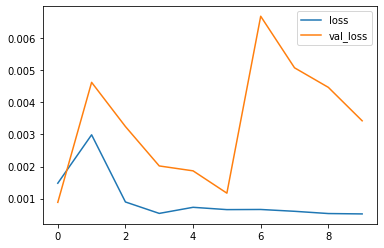

In [316]:


losses = pd.DataFrame(model.history.history)
losses.plot()



In [317]:
first_eval_batch = scaled_train[-length:]



first_eval_batch



array([[0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99445369],
       [0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99445369],
       [0.37580994, 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99417637],
       [0.37580994, 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99417637],
       [0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99417637],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99389906],
       [0.4362851 , 0.9945199 , 0.97824994, 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99389906],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99389906],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99404762, 0.81040757,
        0.9854213 , 0.985130

In [318]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [319]:
model.predict(first_eval_batch)

array([[0.40465018, 0.99726814, 0.98070574, 0.9968269 , 0.80937326,
        0.9883679 , 0.9845455 , 0.9967814 ]], dtype=float32)

In [320]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [321]:
test_predictions

[array([0.40465018, 0.99726814, 0.98070574, 0.9968269 , 0.80937326,
        0.9883679 , 0.9845455 , 0.9967814 ], dtype=float32),
 array([0.42132986, 0.9961864 , 0.98010194, 0.9956591 , 0.80408335,
        0.98739135, 0.9837773 , 0.9956595 ], dtype=float32),
 array([0.43761384, 0.9955017 , 0.97997373, 0.994969  , 0.8001548 ,
        0.9868277 , 0.9834831 , 0.99496424], dtype=float32),
 array([0.45189655, 0.99490064, 0.9798366 , 0.994349  , 0.79758143,
        0.98630774, 0.98320735, 0.99434704], dtype=float32),
 array([0.4649225 , 0.99445754, 0.97982097, 0.9939015 , 0.7957623 ,
        0.9859408 , 0.9830674 , 0.9939001 ], dtype=float32),
 array([0.47643757, 0.99410415, 0.9798418 , 0.9935435 , 0.7945091 ,
        0.98564744, 0.9829802 , 0.99354434], dtype=float32),
 array([0.48662394, 0.9938301 , 0.97989976, 0.99326974, 0.79361016,
        0.98542696, 0.9829427 , 0.9932721 ], dtype=float32),
 array([0.4955449 , 0.9936143 , 0.97997546, 0.99305636, 0.79294586,
        0.985258  , 0.9829348

In [322]:
scaled_test

array([[0.81209503, 0.99690255, 0.99635404, ..., 0.99011614, 0.99386485,
        0.99584027],
       [0.68682505, 0.99690255, 0.99635404, ..., 0.98937485, 0.9964942 ,
        0.99528564],
       [0.74946004, 0.99690255, 0.99270807, ..., 0.98912775, 0.99737065,
        0.99528564],
       ...,
       [0.68682505, 0.99666428, 0.98554187, ..., 1.00123548, 0.98863636,
        0.99584027],
       [0.62419006, 0.99666428, 0.98554187, ..., 1.00123548, 0.98863636,
        0.99584027],
       [0.68682505, 0.99666428, 0.98554187, ..., 1.        , 0.98863636,
        0.99584027]])

In [323]:

true_predictions = scaler.inverse_transform(test_predictions)


In [324]:


true_predictions



array([[ 1.87353034,  0.32534385,  1.06533441, ...,  0.09924953,
         2.9864246 ,  0.3339376 ],
       [ 1.95075723,  0.27994218,  1.01730855, ...,  0.05972804,
         2.73222794,  0.29348051],
       [ 2.0261521 ,  0.25120623,  1.00711076, ...,  0.03691587,
         2.63488022,  0.26841057],
       ...,
       [ 2.5615081 ,  0.13874148,  1.10179234, ..., -0.04352377,
         2.65454304,  0.17397486],
       [ 2.56150672,  0.13873898,  1.10179234, ..., -0.04352377,
         2.65452332,  0.17397486],
       [ 2.56150755,  0.13874148,  1.10179234, ..., -0.04352618,
         2.65456276,  0.17397271]])

In [325]:


true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)



In [326]:
true_predictions.head(4000)

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
0,1.873530,0.325344,1.065334,0.292060,-1.188423,0.099250,2.986425,0.333938
1,1.950757,0.279942,1.017309,0.244975,-1.333790,0.059728,2.732228,0.293481
2,2.026152,0.251206,1.007111,0.217150,-1.441746,0.036916,2.634880,0.268411
3,2.092281,0.225980,0.996202,0.192152,-1.512462,0.015874,2.543646,0.246154
4,2.152591,0.207383,0.994960,0.174108,-1.562452,0.001025,2.497339,0.230038
...,...,...,...,...,...,...,...,...
3931,2.561508,0.138739,1.101792,0.111241,-1.810506,-0.043524,2.654523,0.173975
3932,2.561508,0.138739,1.101792,0.111241,-1.810501,-0.043524,2.654543,0.173971
3933,2.561508,0.138741,1.101792,0.111241,-1.810496,-0.043524,2.654543,0.173975
3934,2.561507,0.138739,1.101792,0.111244,-1.810509,-0.043524,2.654523,0.173975


In [327]:
from tensorflow.keras.models import load_model

model.save("multivariate.h5")

<AxesSubplot:>

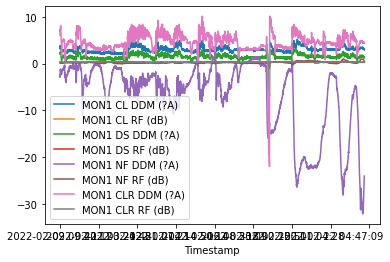

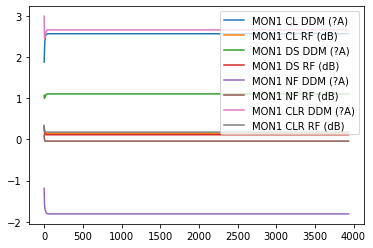

In [328]:
test.plot()

true_predictions.plot()